In [1]:
from maelzel.core import *
cfg = getWorkspace().config
cfg['show.voiceMaxStaves'] = 2


‹3F,3A#,4D#,4G#:1♩›
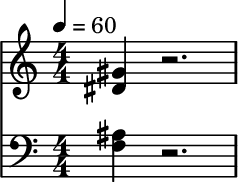

In [2]:
ch = Chord("3f 3A#! 4Eb 4g#")
ch

‹3B,4D#,4G#:1♩›
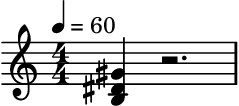

In [3]:
ch = Chord("3B 4Eb 4G#")
ch

Fixing one enharmonic variant alters the spelling of its surroundings 

‹3E,4Eb,4Ab:1♩›
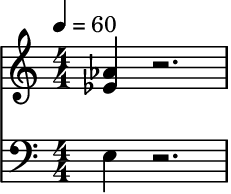

In [4]:
ch = Chord("3E 4Eb! 4G#")
ch

‹3F,3B,4D#,4G#:2♩:f›
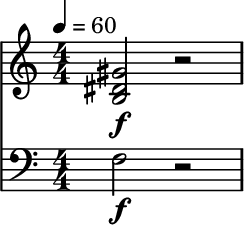

In [5]:
ch = Chord("3f 3b 4d#! 4Ab", dur=2, dynamic='f')
ch

Applying a notehead symbol to a chord modifies all the notes within the chord. To apply a symbol to a specific note in the chord, address the specific note.

‹3F,3B,4D#,4G#:2♩:f›
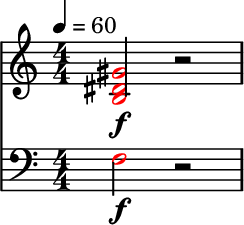

In [6]:
ch.addSymbol(symbols.Notehead(color='red'))
ch

Notice that symbols specific to a note within a chord have a higher priority that those of a chord. In this case, a note of a chord has an added blue symbol and this is retained even if a red symbol is added to the chord as a whole. 

‹3F,3B,4D#,4G#:2♩:f›
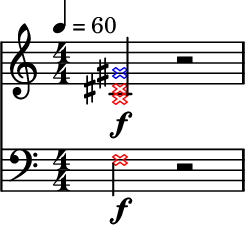

In [7]:
ch = Chord("3f 3b 4d# 4g#", dur=2, dynamic='f')
ch[-1].addSymbol(symbols.Notehead(color='blue'))
ch.addSymbol(symbols.Notehead(color='red'))
ch.addSymbol(symbols.Notehead('x'))
ch

Notes withn a chord are always sorted, from low to high

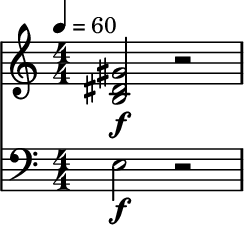

[3E:1♩, 3B:1♩, 4D♯:1♩, 4G♯:1♩]

In [8]:
ch = Chord(["3b", "3e", "4Eb", "4g#"], dur=2, dynamic='f')
ch.show()
ch.notes

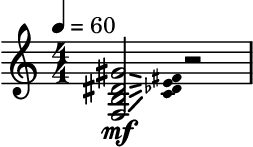

[‹3F,3B,4D#,4G#:gliss:2♩ mf attachments=[GlissMap(pairs=[(53.0, 60.0), (59.0, 61.0), (63.0, 64.0), (68.0, 66.0)])]›,
 ‹4C,4C#,4E,4F#:𝆔 attachments=[StemTraits(hidden=True)]›]

In [9]:
ch = Chord("3f 3b 4D# 4Ab", dur=2, dynamic='mf', gliss='4c 4c# 4E 4Gb')
ch.show()
ch.scoringEvents()

True [3F:1♩:gliss=4C, 3B:1♩, 4D♯:1♩, 4G♯:1♩]


‹3F,3B,4D#,4G#:2♩:gliss›
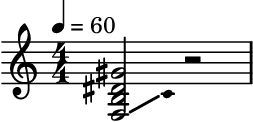

In [10]:
ch = Chord("3f 3b 4D# 4Ab", dur=2, gliss=True)
ch[0].gliss = 60
print(ch.gliss, ch.notes)
ch

Chain([‹3F,3B,4D#,4G#:2♩:gliss›, ‹3Gb,3Bb,4D,4A:0.5♩›])
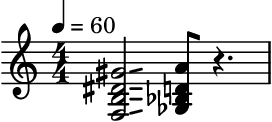

In [11]:
chain = Chain([
    Chord("3f 3b 4D# 4Ab", dur=2, gliss=True),
    Chord("3F# 3Bb 4D 4A", dur=0.5)
])
chain

In [12]:
ch.gliss

True

‹3F,3B,4D#,4G#:2♩:gliss›
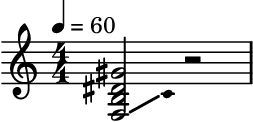

In [13]:
from maelzel.core import *
ch = Chord("3f 3b 4D# 4Ab", dur=2, gliss='4D 4D# 4E 4Gb')
ch[0].gliss = 60
ch

In [14]:
ch[0]._parent,

(‹3F,3B,4D#,4G#:2♩:gliss›,)

‹2F,3B,4Eb,4Ab:4♩:gliss=4C,4C#,4E,4F#:mf›
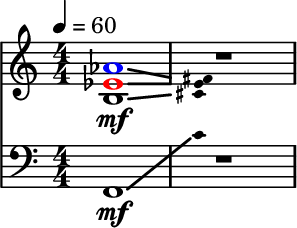

In [15]:
ch = Chord("2f 3b 4D# 4Ab!", dur=4, dynamic='mf', gliss='4c 4c# 4E 4Gb')
ch[-1].addSymbol(symbols.Notehead(color='blue'))
next(n for n in ch.notes if n == '4Eb')
ch.note(pitch='4Eb').addSymbol(symbols.Notehead(color='red'))
ch


In [16]:
ch.notes

[2F:1♩,
 3B:1♩,
 4D♯:1♩:symbols=[Notehead(color=red)],
 4A♭:1♩:symbols=[Notehead(color=blue)]]

4D♯:1♩:symbols=[Notehead(color=red)]
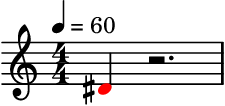

In [17]:
next(n for n in ch.notes if n == '4Eb')

False


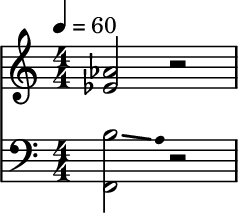

In [18]:
from maelzel.core import *
ch = Chord("2f 3b 4D# 4Ab!", dur=2)
print(ch.gliss)
ch[1].gliss = '3A'
ch.show()
# ch.rec(nchnls=1, instr='.piano')


In [19]:
ch.gliss

True

In [20]:
evs = ch.scoringEvents()
evs

[‹2F,3B,4D#,4Ab!:gliss:2♩ attachments=[GlissMap(pairs=[(59.0, 57.0)])]›,
 ‹3A:𝆔 attachments=[StemTraits(hidden=True)]›]

Within tied notes/chords, they must share the same enharmonic spelling. In this case the first pitch of a logical tie determines the spelling, disregarding pinned spellings which might be set later on 

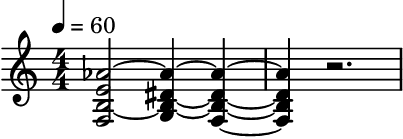

OfflineRenderer(sr=44100)
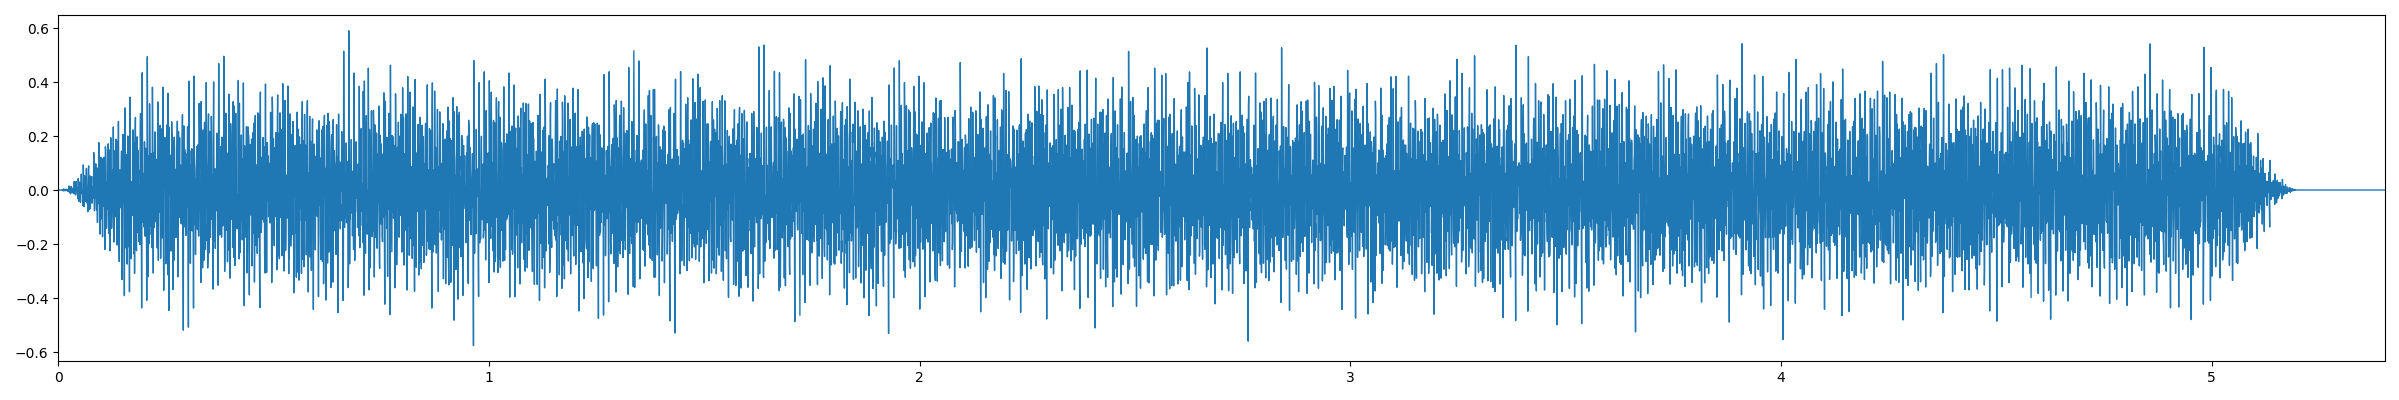

In [21]:
v = Voice([
    Chord("3f 3b 4E 4Ab!", dur=2, tied=True),
    Chord("3g 3b 4D# 4G#", 1, tied=True),
    Chord("3f 3b 4Eb! 4Ab", dur=2, tied=True), 
])
v.show()
v.rec(nchnls=1, instr='saw', kcutoffratio=3, fade=0.2, sustain=0.2)

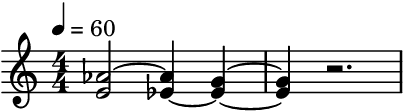

OfflineRenderer(sr=44100)
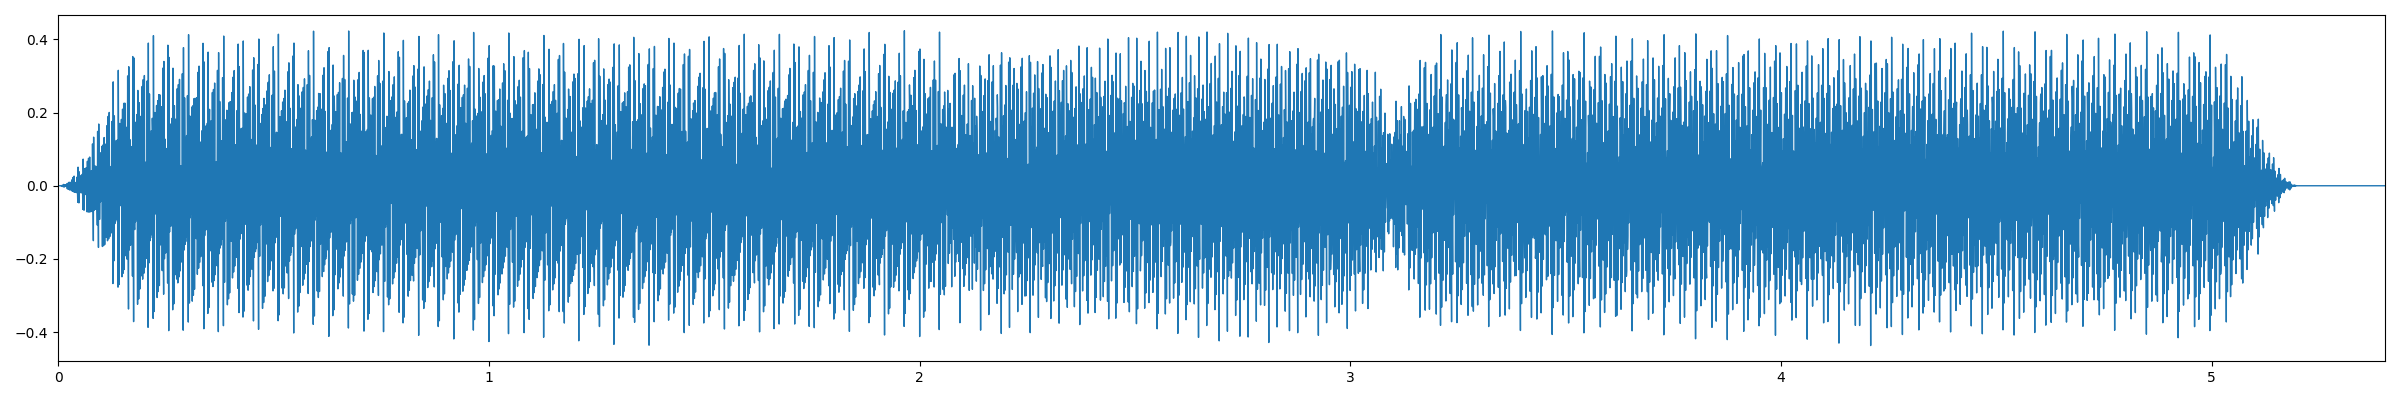

In [11]:
v = Voice([
    Chord("4E  4Ab", dur=2, tied=True),
    Chord("4D# 4Ab", 1, tied=True),
    Chord("4D# 4G", dur=2, tied=True), 
])
v.show()
v.rec(nchnls=1, instr='saw', kcutoffratio=3, fade=0.2, sustain=0.2)

In [12]:
v.synthEvents()

[SynthEvent(delay=0, dur=2, instr=sin, gain=1, chan=1, fade=(0.02, 0.02), position=0.5, bps=｢0 64 -8.8; 2 64 -8.8｣),
 SynthEvent(delay=0, dur=3, instr=sin, gain=1, chan=1, fade=(0.02, 0.02), position=0.5, bps=｢0 68 -8.8; 2 68 -8.8; 3 68 -8.8｣),
 SynthEvent(delay=2, dur=1, instr=sin, gain=1, chan=1, fade=(0.02, 0.02), position=0.5, bps=｢0 63 -8.8; 1 63 -8.8｣),
 SynthEvent(delay=3, dur=2, instr=sin, gain=1, chan=1, fade=(0.02, 0.02), position=0.5, bps=｢0 63 -8.8; 2 63 -8.8｣),
 SynthEvent(delay=3, dur=2, instr=sin, gain=1, chan=1, fade=(0.02, 0.02), position=0.5, bps=｢0 67 -8.8; 2 67 -8.8｣)]

Voice([‹3Ab 5F+ 0.25♩›, ‹3C+ 4E- 4G# 5F+ 0.25♩›, ‹3C+ 3G+ 5F+ 6Eb 0.25♩›])
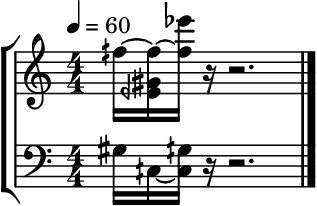

In [3]:
v = Voice(r"""
    3Ab,5Gb-:1/4:tied
    3C+,4E-,4Ab,5F+:1/4:tied
    3Db-,3G+,5F+,6D#:1/4
""")
v

Voice([‹4Bb-,5D-,5F,5Ab-~:1♩›, ‹4A+,5C#+,5E+,5G+,5A+:1♩›])
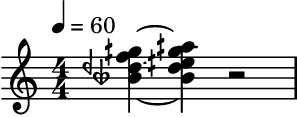

In [23]:
from maelzel.core import *
cfg = getConfig()
cfg['show.voiceMaxStaves'] = 2


v = Voice(r"""
    4Bb-!,5d-,5f,5Ab-:tied
    4A+,5C#+,5E+,5G+,5A+
""")
v

‹4C,4D:1♩›
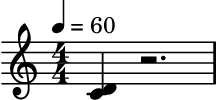

In [22]:
# index within chord
ch = Chord([Note(60), Note(62)])
ch